In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

#PERGUNTA: como a renda per capta influência no acesso a Internet doméstica e a TV nas areas rurais e urbana?

#OBJETIVO: Entender como a renda per capta influência no acesso a Internet e a TV 


novo_dados = pd.read_csv("resumo2.csv", sep= ',')
#tirando os null 
novo_dados = novo_dados[pd.notnull(novo_dados.UF)&pd.notnull(novo_dados.V0227)]
#criando o DataFrame
novo_dados = pd.DataFrame(novo_dados)
#mudando os nomes das colunas
novo_dados.columns = ["Nº","UF", "PB","COR","Internet","RendaperCap", "Area"]
#Criando Categorias
novo_dados.UF = novo_dados.UF.astype('category')
novo_dados.PB = novo_dados.PB.astype('category')
novo_dados.COR = novo_dados.COR.astype('category')
novo_dados.Internet = novo_dados.Internet.astype('category')
novo_dados.Area = novo_dados.Area.astype('category')
novo_dados.RendaperCap = novo_dados.RendaperCap.astype('float')
#tirar o valor absurdo de 99999999 da renda per cap
novo_dados = novo_dados[novo_dados.RendaperCap != 999999999999]

#mudando rotulos categoricos
novo_dados.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")
novo_dados.PB.cat.categories = ("Sim","Não")
novo_dados.COR.cat.categories = ("Sim")
novo_dados.Internet.cat.categories = ("Sim", "Não")
novo_dados.Area.cat.categories = ["Urbana1","Urbana2","Urbana3","Rural1","Rural2","Rural3","Rural4","Rural5"]


#novo_dados.Internet.value_counts()
#novo_dados.PB.value_counts()


novo_dados.head()


,Nº,UF,PB,COR,Internet,RendaperCap,Area
2,2,Rondonia,Não,Sim,Sim,1150.0,Urbana1
4,4,Rondonia,Não,Sim,Não,2900.0,Urbana1
72,72,Rondonia,Não,Sim,Sim,590.0,Urbana1
75,75,Rondonia,Sim,Sim,Não,1260.0,Urbana1
83,83,Rondonia,Não,Sim,Não,863.0,Urbana1


In [77]:
#criando nova coluna de Area

novo_dados.loc[(novo_dados.Area == "Urbana1") | (novo_dados.Area == "Urbana2")| \
(novo_dados.Area == "Urbana3"), "Area_Nova"] = "Urbana" 
novo_dados.loc[(novo_dados.Area == "Rural1") | (novo_dados.Area == "Rural2")| \
(novo_dados.Area == "Rural3")| (novo_dados.Area == "Rural4")| (novo_dados.Area == "Rural5"), "Area_Nova"] = "Rural" 


#criando nova coluna de TV
novo_dados.loc[(novo_dados.PB == "Sim"), "TV"] = "Sim"
novo_dados.loc[(novo_dados.PB == "Não"), "TV"] = "Não"
novo_dados.loc[(novo_dados.COR == "Sim"), "TV"] = "Sim"
novo_dados.loc[(novo_dados.COR == "Não"), "TV"] = "Não"


In [86]:
novo_dados

,Nº,UF,PB,COR,Internet,RendaperCap,Area,Area_Nova,TV
2,2,Rondonia,Não,Sim,Sim,1150.0,Urbana1,Urbana,Sim
4,4,Rondonia,Não,Sim,Não,2900.0,Urbana1,Urbana,Sim
72,72,Rondonia,Não,Sim,Sim,590.0,Urbana1,Urbana,Sim
75,75,Rondonia,Sim,Sim,Não,1260.0,Urbana1,Urbana,Sim
83,83,Rondonia,Não,Sim,Não,863.0,Urbana1,Urbana,Sim
118,118,Rondonia,Não,Sim,Não,288.0,Urbana1,Urbana,Sim
121,121,Rondonia,Não,Sim,Não,1000.0,Urbana1,Urbana,Sim
126,126,Rondonia,Não,Sim,Não,600.0,Rural5,Rural,Sim
141,141,Rondonia,Não,Sim,Não,833.0,Urbana1,Urbana,Sim
151,151,Rondonia,Não,Sim,Não,560.0,Urbana1,Urbana,Sim


In [66]:

"""
Classes Sociais segundo IBGE
A --  > 20 SM
B -- 10 a 20 SM
C -- 4 a 10 
D -- 2 a 4 SM
E -- < 2SM

"""
faixa= [0,788*2,788*4,788*10,788*20]
faixa1 = range(0,5000,25)
#criando renda area urbana
rendaU = novo_dados.RendaperCap[novo_dados.Area_Nova == "Urbana"]
#criando renda area rural
rendaR = novo_dados.RendaperCap[novo_dados.Area_Nova == "Rural"]
#dividindo a area urbana em classes sociais 
rendaUfaixa = pd.cut(rendaU, faixa, False)
#dividindo a area rural em classes sociais 
rendaRfaixa = pd.cut(rendaR, faixa, False)




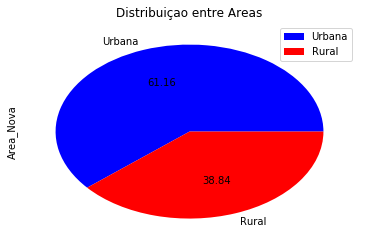

In [67]:
u = novo_dados.Area_Nova.value_counts(True)
u = u * 100
u.plot(kind='pie', colors=('blue', 'red'), title="Distribuiçao entre Areas", autopct="%0.2f",legend=True)


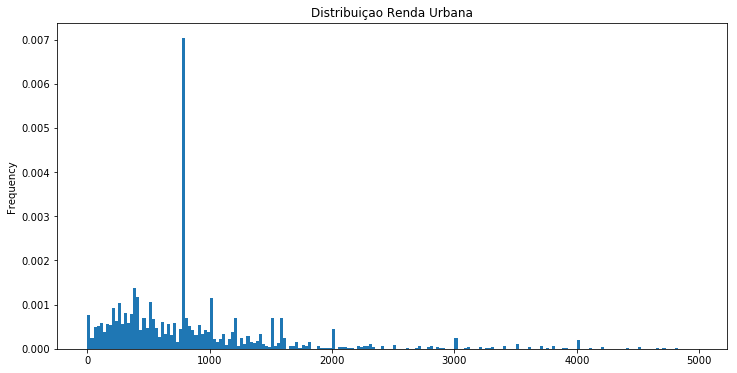

In [73]:
plot = rendaU.plot.hist(bins=faixa1, normed=True,figsize = (12,6),title = "Distribuiçao Renda Urbana")




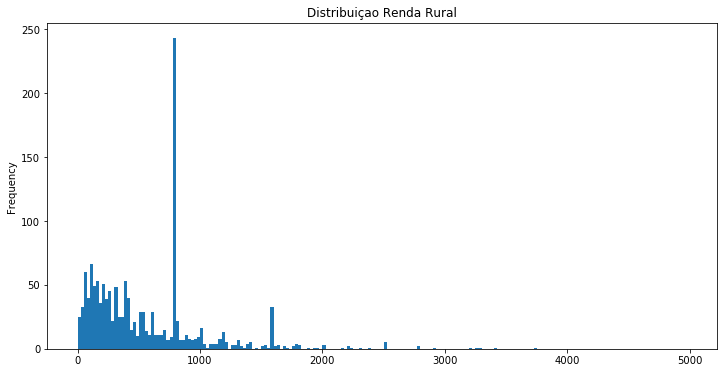

In [74]:
plot = rendaR.plot.hist(bins=faixa1,figsize = (12,6) ,title = "Distribuiçao Renda Rural")




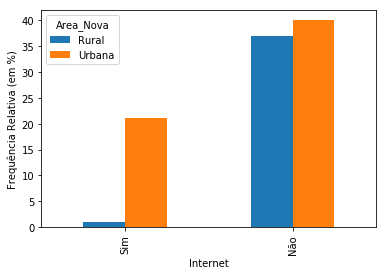

In [56]:
ct1 = pd.crosstab(novo_dados.Internet, novo_dados.Area_Nova)
ct1 = (ct1/ct1.sum().sum()*100).round(decimals=0)
ct1.plot(kind="bar")
plt.ylabel('Frequência Relativa (em %)')

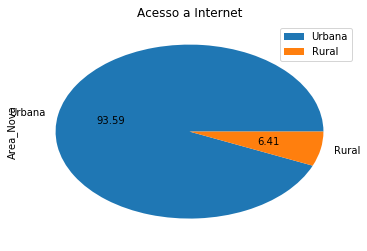

In [60]:
ct2 = novo_dados.Area_Nova[novo_dados.Internet == "Sim"].value_counts()
ct2.plot(kind='pie', title = "Acesso a Internet", autopct="%.2f",legend=True)




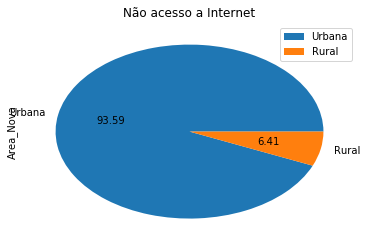

In [61]:
ct3 = novo_dados.Area_Nova[novo_dados.Internet == "Não"].value_counts()
ct3.plot(kind='pie', title = "Não acesso a Internet", autopct="%.2f",legend=True)


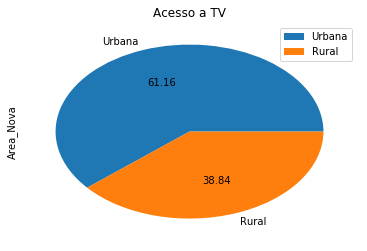

In [84]:
ct4 = novo_dados.Area_Nova[novo_dados.TV == "Sim"].value_counts()
ct4.plot(kind='pie', title = "Acesso a TV", autopct="%.2f",legend=True)

In [87]:
#ct5 = novo_dados.Area_Nova[novo_dados.TV == "Não"].value_counts()
#ct5.plot(kind='pie', title = "Não acesso a Internet", autopct="%.2f",legend=True)